In [1]:
cd '/Users/rabarry/Documents/Insight/NYC data/SafeEats/data/processed'

/Users/rabarry/Documents/Insight/NYC data/SafeEats/data/processed


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import swifter
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [3]:
Data = pd.read_csv('HD_InspCounts_Full.csv')
Data_Avg_Flags = pd.read_csv('HD_grouped_byRest_Years.csv')

In [5]:
Data = Data.set_index('CAMIS')
Data.head(n=2)
len(Data)
Data_Avg_Flags = Data_Avg_Flags.set_index('CAMIS')
Data_Avg_Flags.head(n=2)

,Unnamed: 0,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
CAMIS,,,,,,,,,,,,,,,,,,,,
30075445,0,Initial,2019-10-21,2.0,Re-inspection,2019-11-04,1,14 days 00:00:00.000000000,MORRIS PARK BAKE SHOP,Bronx,10462.0,Bakery,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37
30112340,1,Initial,2018-03-13,1.0,Initial,2019-03-04,1,356 days 00:00:00.000000000,WENDY'S,Brooklyn,11225.0,Hamburgers,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3.011970e+09,BK60


25697

,total_critical_flags,first_inspection_date,last_inspection_date,num_years_active,avg_num_critical_flags_per_year
CAMIS,,,,,
30075445,5,2017-05-18,2019-11-04,2.0,2.5
30112340,9,2016-04-12,2019-03-04,3.0,3.0


In [6]:
Data.describe()
Data["Second_Last_Insp_Date"] = pd.to_datetime(Data["Second_Last_Insp_Date"])
Data["Last_Insp_Date"] = pd.to_datetime(Data["Last_Insp_Date"])
Data['Insp_Date_Diff'] = (Data["Last_Insp_Date"] - Data["Second_Last_Insp_Date"]).dt.days
Data.dtypes

,Unnamed: 0,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Num_CriticialFlags,ZIPCODE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,25697.000000,23794.000000,25697.000000,25298.000000,25647.000000,25647.000000,25248.000000,25248.000000,25248.000000,2.511400e+04,2.564700e+04
mean,32896.849905,1.556359,1.270382,10672.241837,40.094740,-72.793501,248.336819,19.914686,28976.979800,2.506026e+06,2.391907e+09
std,19211.503343,1.265577,1.018764,596.440637,5.040893,9.151426,131.959125,15.828897,30943.126441,1.357688e+06,1.352866e+09
min,0.000000,0.000000,0.000000,10000.000000,0.000000,-74.248434,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,16192.000000,1.000000,1.000000,10022.000000,40.686058,-73.989324,105.000000,4.000000,7900.000000,1.042399e+06,1.010320e+09
50%,32712.000000,1.000000,1.000000,10467.000000,40.732767,-73.959469,301.000000,19.000000,15900.000000,3.003576e+06,3.000550e+09
75%,49405.000000,2.000000,2.000000,11229.000000,40.761801,-73.899346,401.000000,34.000000,40500.000000,4.000255e+06,4.001625e+09
max,67088.000000,10.000000,10.000000,12345.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


Unnamed: 0                                      int64
Second_Last_Insp_Type                          object
Second_Last_Insp_Date                  datetime64[ns]
Second_Last_Insp_Num_CriticialFlags           float64
Last_Insp_Type                                 object
Last_Insp_Date                         datetime64[ns]
Last_Insp_Num_CriticialFlags                    int64
Insp_Date_Diff                                float64
DBA                                            object
BORO                                           object
ZIPCODE                                       float64
CUISINE DESCRIPTION                            object
Latitude                                      float64
Longitude                                     float64
Community Board                               float64
Council District                              float64
Census Tract                                  float64
BIN                                           float64
BBL                         

In [7]:
Data2 = pd.merge(Data, Data_Avg_Flags, left_on = ['CAMIS'], right_on = ['CAMIS'], how = 'left')
len(Data2)
Data2 = Data2.reset_index()
Data2.head()

25697

,CAMIS,Unnamed: 0,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,DBA,...,Council District,Census Tract,BIN,BBL,NTA,total_critical_flags,first_inspection_date,last_inspection_date,num_years_active,avg_num_critical_flags_per_year
0,30075445,0,Initial,2019-10-21,2.0,Re-inspection,2019-11-04,1,14.0,MORRIS PARK BAKE SHOP,...,13.0,25200.0,2045445.0,2.041270e+09,BX37,5,2017-05-18,2019-11-04,2.0,2.5
1,30112340,1,Initial,2018-03-13,1.0,Initial,2019-03-04,1,356.0,WENDY'S,...,40.0,32700.0,3029737.0,3.011970e+09,BK60,9,2016-04-12,2019-03-04,3.0,3.0
2,30191841,4,Initial,2018-05-16,1.0,Initial,2019-06-06,1,386.0,DJ REYNOLDS PUB AND RESTAURANT,...,3.0,13900.0,1026048.0,1.010480e+09,MN15,5,2017-07-27,2019-06-06,2.0,2.5
3,40356018,6,Initial,2018-10-30,1.0,Initial,2019-11-08,1,374.0,RIVIERA CATERERS,...,47.0,34800.0,3347399.0,3.069970e+09,BK21,3,2017-07-20,2019-11-08,2.0,1.5
4,40356151,9,Initial,2017-08-19,1.0,Initial,2018-10-06,2,413.0,BRUNOS ON THE BOULEVARD,...,22.0,32900.0,4024132.0,4.011000e+09,QN28,4,2016-05-14,2018-10-06,2.0,2.0


# Get 311 dataset set up

In [3]:
ny311 = pd.read_csv('NY311_FoodCalls.csv')
ny311.columns

Index(['createddate', 'complainttype', 'descriptor', 'locationtype',
       'incidentzip', 'landmark', 'latitude', 'longitude', 'cleaned_date'],
      dtype='object')

In [4]:
len(ny311)

71006

In [7]:
ny311['complainttype'].value_counts()
ny311['descriptor'].value_counts()
ny311['locationtype'].value_counts()

Food Establishment                51960
Food Poisoning                    15894
Drinking                           2922
Mobile Food Vendor                   87
Urinating in Public                  84
Rodent                               32
Drinking Water                       10
Bottled Water                         7
Mold                                  3
Indoor Sewage                         3
Standing Water                        2
Unsanitary Pigeon Condition           1
Unsanitary Animal Pvt Property        1
Name: complainttype, dtype: int64

Rodents/Insects/Garbage             14383
1 or 2                              13548
Food Spoiled                         4369
Letter Grading                       4152
Bare Hands in Contact w/ Food        3613
Food Contaminated                    3461
Food Contains Foreign Object         3228
Kitchen/Food Prep Area               2690
3 or More                            2346
Underage - Licensed Est              2141
Food Worker Hygiene                  1949
Pet/Animal                           1825
Food Temperature                     1605
Toilet Facility                      1501
Odor                                 1249
No Permit or License                 1218
Food Protection                      1036
Permit/License/Certificate            761
Food Preparation Location             750
Handwashing                           701
Dishwashing/Utensils                  658
After Hours - Licensed Est            614
Facility Construction                 491
Food Worker Activity              

Restaurant/Bar/Deli/Bakery    65891
Club/Bar/Restaurant            3006
Restaurant                      879
Food Cart Vendor                839
Catering Service                364
Cafeteria                        16
Catering Hall                    11
Name: locationtype, dtype: int64

In [5]:
ny311["cleaned_date"] = pd.to_datetime(ny311["cleaned_date"])
ny311['latitude'] = ny311['latitude'].round(5)
ny311['longitude'] = ny311['longitude'].round(5)
ny311['location'] = ny311['latitude'].astype(str) + ', ' + ny311['longitude'].astype(str)
ny311.head()
ny311.describe()
ny311.dtypes
ny311.info()

,createddate,complainttype,descriptor,locationtype,incidentzip,landmark,latitude,longitude,cleaned_date,location
0,10/1/19 8:56,Rodent,Rat Sighting,Restaurant,11211.0,NORTH 7 STREET,40.71769,-73.95747,2019-10-01,"40.71769, -73.95747"
1,10/6/19 19:11,Food Poisoning,1 or 2,Food Cart Vendor,10029.0,2 AVENUE,40.78515,-73.94643,2019-10-06,"40.78515, -73.94643"
2,10/7/19 18:19,Food Poisoning,3 or More,Restaurant,11367.0,MAIN STREET,40.72635,-73.82167,2019-10-07,"40.72635, -73.82167"
3,10/11/19 16:13,Food Establishment,Food Contaminated,Restaurant/Bar/Deli/Bakery,10002.0,CHRYSTIE STREET,40.71742,-73.99421,2019-10-11,"40.71742, -73.99421"
4,10/11/19 23:22,Food Establishment,Letter Grading,Restaurant/Bar/Deli/Bakery,10032.0,AUDUBON AVENUE,40.84057,-73.93829,2019-10-11,"40.84057, -73.93829"


,incidentzip,latitude,longitude
count,70370.000000,70080.000000,70080.000000
mean,10667.574890,40.729783,-73.941416
std,765.589604,0.072188,0.076659
min,0.000000,40.505290,-74.251280
25%,10024.000000,40.684590,-73.987890
50%,10466.000000,40.736095,-73.955115
75%,11226.000000,40.767540,-73.900760
max,99999.000000,40.910740,-73.700790


createddate              object
complainttype            object
descriptor               object
locationtype             object
incidentzip             float64
landmark                 object
latitude                float64
longitude               float64
cleaned_date     datetime64[ns]
location                 object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71006 entries, 0 to 71005
Data columns (total 10 columns):
createddate      71006 non-null object
complainttype    71006 non-null object
descriptor       70922 non-null object
locationtype     71006 non-null object
incidentzip      70370 non-null float64
landmark         4875 non-null object
latitude         70080 non-null float64
longitude        70080 non-null float64
cleaned_date     71006 non-null datetime64[ns]
location         71006 non-null object
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 5.4+ MB


In [6]:
ny311 = ny311[np.isfinite(ny311['latitude'])]
ny311.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70080 entries, 0 to 71005
Data columns (total 10 columns):
createddate      70080 non-null object
complainttype    70080 non-null object
descriptor       69997 non-null object
locationtype     70080 non-null object
incidentzip      70073 non-null float64
landmark         4873 non-null object
latitude         70080 non-null float64
longitude        70080 non-null float64
cleaned_date     70080 non-null datetime64[ns]
location         70080 non-null object
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 5.9+ MB


In [7]:
ny311['complainttype'].value_counts()
ny311['descriptor'].value_counts()

Food Establishment                51173
Food Poisoning                    15766
Drinking                           2914
Mobile Food Vendor                   86
Urinating in Public                  83
Rodent                               31
Drinking Water                       10
Bottled Water                         7
Mold                                  3
Indoor Sewage                         3
Standing Water                        2
Unsanitary Animal Pvt Property        1
Unsanitary Pigeon Condition           1
Name: complainttype, dtype: int64

Rodents/Insects/Garbage             14182
1 or 2                              13433
Food Spoiled                         4328
Letter Grading                       4094
Bare Hands in Contact w/ Food        3528
Food Contaminated                    3410
Food Contains Foreign Object         3168
Kitchen/Food Prep Area               2661
3 or More                            2333
Underage - Licensed Est              2134
Food Worker Hygiene                  1934
Pet/Animal                           1790
Food Temperature                     1568
Toilet Facility                      1483
Odor                                 1238
No Permit or License                 1204
Food Protection                      1016
Permit/License/Certificate            754
Food Preparation Location             724
Handwashing                           687
Dishwashing/Utensils                  652
After Hours - Licensed Est            613
Facility Construction                 486
Food Worker Activity              

In [8]:
#get count of food-related complaints at each date for each lat/long
ny311_counts = ny311.groupby(["location", 'cleaned_date']).agg({'complainttype': 'count'})
ny311_counts = ny311_counts.reset_index()
len(ny311_counts)
ny311_counts = ny311_counts.sort_values('complainttype')
ny311_counts.head()
ny311_counts.tail()

65413

,location,cleaned_date,complainttype
0,"40.50529, -74.24559",2015-09-05,1
43010,"40.7569, -73.78933",2014-06-11,1
43012,"40.7569, -73.96707",2017-02-28,1
43013,"40.7569, -73.96707",2017-04-17,1
43014,"40.7569, -73.96707",2018-09-17,1


,location,cleaned_date,complainttype
2021,"40.58743, -73.81238",2018-06-20,19
20312,"40.70222, -73.90425",2015-02-22,20
44986,"40.75979, -73.82924",2018-12-05,21
57719,"40.82025, -73.95495",2014-09-29,21
57720,"40.82025, -73.95495",2014-09-30,26


# Data2 feature engineering

In [13]:
Data2['Latitude'] = Data2['Latitude'].round(5)
Data2['Longitude'] = Data2['Longitude'].round(5)
Data2['location'] = Data2['Latitude'].astype(str) + ', ' + Data2['Longitude'].astype(str)
Data2.head()

,CAMIS,Unnamed: 0,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,DBA,...,Census Tract,BIN,BBL,NTA,total_critical_flags,first_inspection_date,last_inspection_date,num_years_active,avg_num_critical_flags_per_year,location
0,30075445,0,Initial,2019-10-21,2.0,Re-inspection,2019-11-04,1,14.0,MORRIS PARK BAKE SHOP,...,25200.0,2045445.0,2.041270e+09,BX37,5,2017-05-18,2019-11-04,2.0,2.5,"40.84823, -73.85597"
1,30112340,1,Initial,2018-03-13,1.0,Initial,2019-03-04,1,356.0,WENDY'S,...,32700.0,3029737.0,3.011970e+09,BK60,9,2016-04-12,2019-03-04,3.0,3.0,"40.66265, -73.96208"
2,30191841,4,Initial,2018-05-16,1.0,Initial,2019-06-06,1,386.0,DJ REYNOLDS PUB AND RESTAURANT,...,13900.0,1026048.0,1.010480e+09,MN15,5,2017-07-27,2019-06-06,2.0,2.5,"40.76733, -73.98431"
3,40356018,6,Initial,2018-10-30,1.0,Initial,2019-11-08,1,374.0,RIVIERA CATERERS,...,34800.0,3347399.0,3.069970e+09,BK21,3,2017-07-20,2019-11-08,2.0,1.5,"40.57992, -73.98209"
4,40356151,9,Initial,2017-08-19,1.0,Initial,2018-10-06,2,413.0,BRUNOS ON THE BOULEVARD,...,32900.0,4024132.0,4.011000e+09,QN28,4,2016-05-14,2018-10-06,2.0,2.0,"40.76397, -73.88097"


Text(0.5, 1.0, 'Number of Critical Violations Last Insp')

(0, 5)

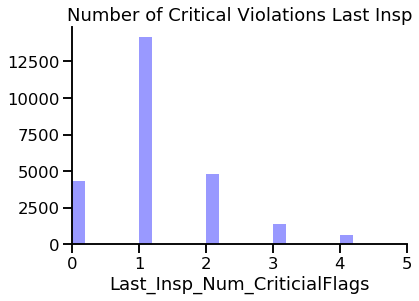

In [14]:
sns.set_context("talk")
sns.distplot(Data2['Last_Insp_Num_CriticialFlags'], kde=False, color='b')
sns.despine()
plt.title('Number of Critical Violations Last Insp')
plt.xlim(0,5) 
plt.savefig('Histogram_LastInsp.png')

In [15]:
Data2['is_good_overall'] = np.where(Data2['avg_num_critical_flags_per_year']>1,0,1)
Data2['is_good_lastInsp'] = np.where(Data2['Last_Insp_Num_CriticialFlags']>=1,0,1)

In [16]:
#Data2['avg_num_critical_flags_per_year'].value_counts()
Data2['is_good_overall'].value_counts()
#Data2['Last_Insp_Num_CriticialFlags'].value_counts()
Data2['is_good_lastInsp'].value_counts()

0    21615
1     4082
Name: is_good_overall, dtype: int64

0    21402
1     4295
Name: is_good_lastInsp, dtype: int64

In [17]:
Data2.to_csv('HD_Data_ToUse.csv')

# Merge HD data with 311 data

In [9]:
Data2 = pd.read_csv('HD_Data_ToUse.csv')
ny311_counts.info()
Data2 = Data2[np.isfinite(Data2['Latitude'])]
Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65413 entries, 0 to 57720
Data columns (total 3 columns):
location         65413 non-null object
cleaned_date     65413 non-null datetime64[ns]
complainttype    65413 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25647 entries, 0 to 25696
Data columns (total 30 columns):
Unnamed: 0                             25647 non-null int64
CAMIS                                  25647 non-null int64
Unnamed: 0.1                           25647 non-null int64
Second_Last_Insp_Type                  23759 non-null object
Second_Last_Insp_Date                  23759 non-null object
Second_Last_Insp_Num_CriticialFlags    23759 non-null float64
Last_Insp_Type                         25647 non-null object
Last_Insp_Date                         25647 non-null object
Last_Insp_Num_CriticialFlags           25647 non-null int64
Insp_Date_Diff                         23759

In [19]:
ny311_counts['location'].tail()
Data2['location'].tail()

2021     40.58743, -73.81238
20312    40.70222, -73.90425
44986    40.75979, -73.82924
57719    40.82025, -73.95495
57720    40.82025, -73.95495
Name: location, dtype: object

25692    40.74935, -73.98277
25693    40.74202, -73.96015
25694    40.66793, -73.78101
25695    40.82679, -73.89131
25696    40.61776, -74.03337
Name: location, dtype: object

In [10]:
#merge datasets
HD_ny311 = pd.merge(Data2, ny311_counts, left_on = ['location'], right_on = ['location'], how = 'left')
HD_ny311.head()

,Unnamed: 0,CAMIS,Unnamed: 0.1,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,...,total_critical_flags,first_inspection_date,last_inspection_date,num_years_active,avg_num_critical_flags_per_year,location,is_good_overall,is_good_lastInsp,cleaned_date,complainttype
0,0,30075445,0,Initial,2019-10-21,2.0,Re-inspection,2019-11-04,1,14.0,...,5,2017-05-18,2019-11-04,2.0,2.5,"40.84823, -73.85597",0,0,NaT,NaN
1,1,30112340,1,Initial,2018-03-13,1.0,Initial,2019-03-04,1,356.0,...,9,2016-04-12,2019-03-04,3.0,3.0,"40.66265, -73.96208",0,0,NaT,NaN
2,2,30191841,4,Initial,2018-05-16,1.0,Initial,2019-06-06,1,386.0,...,5,2017-07-27,2019-06-06,2.0,2.5,"40.76733, -73.98431",0,0,NaT,NaN
3,3,40356018,6,Initial,2018-10-30,1.0,Initial,2019-11-08,1,374.0,...,3,2017-07-20,2019-11-08,2.0,1.5,"40.57992, -73.98209",0,0,NaT,NaN
4,4,40356151,9,Initial,2017-08-19,1.0,Initial,2018-10-06,2,413.0,...,4,2016-05-14,2018-10-06,2.0,2.0,"40.76397, -73.88097",0,0,NaT,NaN


In [11]:
len(Data2)
len(ny311_counts)
len(HD_ny311)
len(HD_ny311['CAMIS'].unique())
HD_ny311.info()

25647

65413

38039

25647

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38039 entries, 0 to 38038
Data columns (total 32 columns):
Unnamed: 0                             38039 non-null int64
CAMIS                                  38039 non-null int64
Unnamed: 0.1                           38039 non-null int64
Second_Last_Insp_Type                  35251 non-null object
Second_Last_Insp_Date                  35251 non-null object
Second_Last_Insp_Num_CriticialFlags    35251 non-null float64
Last_Insp_Type                         38039 non-null object
Last_Insp_Date                         38039 non-null object
Last_Insp_Num_CriticialFlags           38039 non-null int64
Insp_Date_Diff                         35251 non-null float64
DBA                                    38039 non-null object
BORO                                   38039 non-null object
ZIPCODE                                37640 non-null float64
CUISINE DESCRIPTION                    38039 non-null object
Latitude                              

In [17]:
HD_ny311["Second_Last_Insp_Date"] = pd.to_datetime(HD_ny311["Second_Last_Insp_Date"])
HD_ny311["Last_Insp_Date"] = pd.to_datetime(HD_ny311["Last_Insp_Date"])

In [19]:
HD_ny311.columns
HD_ny311 = HD_ny311.drop(columns = ['Unnamed: 0.1'])

Index(['CAMIS', 'Unnamed: 0.1', 'Second_Last_Insp_Type',
       'Second_Last_Insp_Date', 'Second_Last_Insp_Num_CriticialFlags',
       'Last_Insp_Type', 'Last_Insp_Date', 'Last_Insp_Num_CriticialFlags',
       'Insp_Date_Diff', 'DBA', 'BORO', 'ZIPCODE', 'CUISINE DESCRIPTION',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA', 'total_critical_flags',
       'first_inspection_date', 'last_inspection_date', 'num_years_active',
       'avg_num_critical_flags_per_year', 'location', 'is_good_overall',
       'is_good_lastInsp', 'ny311_complaint_date',
       'ny311_number_of_complaints'],
      dtype='object')

In [20]:
HD_ny311.columns
HD_ny311.rename(columns={'cleaned_date':'ny311_complaint_date',
                          'complainttype':'ny311_number_of_complaints'}, 
                 inplace=True)
HD_ny311.columns

Index(['CAMIS', 'Second_Last_Insp_Type', 'Second_Last_Insp_Date',
       'Second_Last_Insp_Num_CriticialFlags', 'Last_Insp_Type',
       'Last_Insp_Date', 'Last_Insp_Num_CriticialFlags', 'Insp_Date_Diff',
       'DBA', 'BORO', 'ZIPCODE', 'CUISINE DESCRIPTION', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA', 'total_critical_flags', 'first_inspection_date',
       'last_inspection_date', 'num_years_active',
       'avg_num_critical_flags_per_year', 'location', 'is_good_overall',
       'is_good_lastInsp', 'ny311_complaint_date',
       'ny311_number_of_complaints'],
      dtype='object')

Index(['CAMIS', 'Second_Last_Insp_Type', 'Second_Last_Insp_Date',
       'Second_Last_Insp_Num_CriticialFlags', 'Last_Insp_Type',
       'Last_Insp_Date', 'Last_Insp_Num_CriticialFlags', 'Insp_Date_Diff',
       'DBA', 'BORO', 'ZIPCODE', 'CUISINE DESCRIPTION', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA', 'total_critical_flags', 'first_inspection_date',
       'last_inspection_date', 'num_years_active',
       'avg_num_critical_flags_per_year', 'location', 'is_good_overall',
       'is_good_lastInsp', 'ny311_complaint_date',
       'ny311_number_of_complaints'],
      dtype='object')

In [21]:
HD_ny311 = HD_ny311.sort_values('ny311_number_of_complaints', ascending = False)
HD_ny311.head()

,CAMIS,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,DBA,BORO,...,total_critical_flags,first_inspection_date,last_inspection_date,num_years_active,avg_num_critical_flags_per_year,location,is_good_overall,is_good_lastInsp,ny311_complaint_date,ny311_number_of_complaints
8659,41401458,Re-inspection,2018-09-25,2.0,Initial,2019-02-28,0,156.0,MOFONGO DEL VALLE,Manhattan,...,7,2016-07-28,2019-02-28,3.0,2.333333,"40.82025, -73.95495",0,1,2014-09-30,26.0
8658,41401458,Re-inspection,2018-09-25,2.0,Initial,2019-02-28,0,156.0,MOFONGO DEL VALLE,Manhattan,...,7,2016-07-28,2019-02-28,3.0,2.333333,"40.82025, -73.95495",0,1,2014-09-29,21.0
37659,50099800,Initial,2019-12-03,2.0,Initial,2019-12-06,0,3.0,MIAO MIAO YA,Queens,...,2,2019-12-03,2019-12-06,0.0,2.000000,"40.75979, -73.82924",0,1,2018-12-05,21.0
34510,50088282,Re-inspection,2019-04-16,1.0,Initial,2019-09-05,0,142.0,TAIWANESE WHEEL CAKE,Queens,...,3,2019-03-14,2019-09-05,0.0,3.000000,"40.75979, -73.82924",0,1,2018-12-05,21.0
33891,50086946,Re-inspection,2019-07-17,1.0,Initial,2019-10-17,0,92.0,NEW KITCHEN,Queens,...,4,2019-06-27,2019-10-17,0.0,4.000000,"40.75979, -73.82924",0,1,2018-12-05,21.0


In [22]:
HD_ny311['time_diff_last_insp_311call'] = HD_ny311['Last_Insp_Date'] - HD_ny311['ny311_complaint_date']

In [ ]:
HD_ny311.info()

In [27]:
HD_ny311.head(10)

,CAMIS,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,DBA,BORO,...,first_inspection_date,last_inspection_date,num_years_active,avg_num_critical_flags_per_year,location,is_good_overall,is_good_lastInsp,ny311_complaint_date,ny311_number_of_complaints,time_diff_last_insp_311call
8659,41401458,Re-inspection,2018-09-25,2.0,Initial,2019-02-28,0,156.0,MOFONGO DEL VALLE,Manhattan,...,2016-07-28,2019-02-28,3.0,2.333333,"40.82025, -73.95495",0,1,2014-09-30,26.0,1612 days
33456,50086172,Initial,2019-03-06,1.0,Re-inspection,2019-06-05,0,91.0,CRYSTAL ICE,Queens,...,2019-01-14,2019-06-05,0.0,6.000000,"40.75979, -73.82924",0,1,2018-12-05,21.0,182 days
8658,41401458,Re-inspection,2018-09-25,2.0,Initial,2019-02-28,0,156.0,MOFONGO DEL VALLE,Manhattan,...,2016-07-28,2019-02-28,3.0,2.333333,"40.82025, -73.95495",0,1,2014-09-29,21.0,1613 days
37659,50099800,Initial,2019-12-03,2.0,Initial,2019-12-06,0,3.0,MIAO MIAO YA,Queens,...,2019-12-03,2019-12-06,0.0,2.000000,"40.75979, -73.82924",0,1,2018-12-05,21.0,366 days
34510,50088282,Re-inspection,2019-04-16,1.0,Initial,2019-09-05,0,142.0,TAIWANESE WHEEL CAKE,Queens,...,2019-03-14,2019-09-05,0.0,3.000000,"40.75979, -73.82924",0,1,2018-12-05,21.0,274 days
33891,50086946,Re-inspection,2019-07-17,1.0,Initial,2019-10-17,0,92.0,NEW KITCHEN,Queens,...,2019-06-27,2019-10-17,0.0,4.000000,"40.75979, -73.82924",0,1,2018-12-05,21.0,316 days
25207,50059314,Initial,2019-10-17,2.0,Re-inspection,2019-11-08,1,22.0,JOE'S STEAM RICE ROLL,Queens,...,2017-03-06,2019-11-08,3.0,4.666667,"40.75979, -73.82924",0,0,2018-12-05,21.0,338 days
20147,50037728,Initial,2018-02-08,0.0,Initial,2019-02-20,1,377.0,NO.1 FAVOR TASTE RESTAURANT,Brooklyn,...,2016-03-22,2019-02-20,3.0,1.666667,"40.63573, -74.01154",0,0,2019-08-28,18.0,-189 days
8657,41401458,Re-inspection,2018-09-25,2.0,Initial,2019-02-28,0,156.0,MOFONGO DEL VALLE,Manhattan,...,2016-07-28,2019-02-28,3.0,2.333333,"40.82025, -73.95495",0,1,2014-09-24,16.0,1618 days
20146,50037728,Initial,2018-02-08,0.0,Initial,2019-02-20,1,377.0,NO.1 FAVOR TASTE RESTAURANT,Brooklyn,...,2016-03-22,2019-02-20,3.0,1.666667,"40.63573, -74.01154",0,0,2019-08-29,12.0,-190 days


In [23]:
HD_ny311['time_diff_last_insp_311call'] = HD_ny311['time_diff_last_insp_311call'].dt.days
HD_ny311['time_diff_last_insp_311call'].head()

8659     1612.0
8658     1613.0
37659     366.0
34510     274.0
33891     316.0
Name: time_diff_last_insp_311call, dtype: float64

In [24]:
HD_ny311.columns

Index(['CAMIS', 'Second_Last_Insp_Type', 'Second_Last_Insp_Date',
       'Second_Last_Insp_Num_CriticialFlags', 'Last_Insp_Type',
       'Last_Insp_Date', 'Last_Insp_Num_CriticialFlags', 'Insp_Date_Diff',
       'DBA', 'BORO', 'ZIPCODE', 'CUISINE DESCRIPTION', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA', 'total_critical_flags', 'first_inspection_date',
       'last_inspection_date', 'num_years_active',
       'avg_num_critical_flags_per_year', 'location', 'is_good_overall',
       'is_good_lastInsp', 'ny311_complaint_date',
       'ny311_number_of_complaints', 'time_diff_last_insp_311call'],
      dtype='object')

# split off ny311 data to do more work with that dataset alone

In [25]:
#split off ny311 data to do more work with that dataset alone
ny311_data = HD_ny311[['CAMIS', 'Last_Insp_Date', 'ny311_complaint_date',
       'ny311_number_of_complaints', 'time_diff_last_insp_311call']]
ny311_data.reset_index()
ny311_data.head()

,index,CAMIS,Last_Insp_Date,ny311_complaint_date,ny311_number_of_complaints,time_diff_last_insp_311call
0,8659,41401458,2019-02-28,2014-09-30,26.0,1612.0
1,8658,41401458,2019-02-28,2014-09-29,21.0,1613.0
2,37659,50099800,2019-12-06,2018-12-05,21.0,366.0
3,34510,50088282,2019-09-05,2018-12-05,21.0,274.0
4,33891,50086946,2019-10-17,2018-12-05,21.0,316.0
...,...,...,...,...,...,...
38034,38034,50101998,2020-01-07,NaT,NaN,NaN
38035,38035,50102076,2020-01-07,NaT,NaN,NaN
38036,38036,50102276,2020-01-09,NaT,NaN,NaN
38037,38037,50102300,2020-01-07,NaT,NaN,NaN


,CAMIS,Last_Insp_Date,ny311_complaint_date,ny311_number_of_complaints,time_diff_last_insp_311call
8659,41401458,2019-02-28,2014-09-30,26.0,1612.0
8658,41401458,2019-02-28,2014-09-29,21.0,1613.0
37659,50099800,2019-12-06,2018-12-05,21.0,366.0
34510,50088282,2019-09-05,2018-12-05,21.0,274.0
33891,50086946,2019-10-17,2018-12-05,21.0,316.0


find calls within the last 6 months of an inspection

In [26]:
ny311_data_6mo = ny311_data[(ny311_data['time_diff_last_insp_311call'] > 0) & (ny311_data['time_diff_last_insp_311call'] < 182.5)]
ny311_data_6mo.tail()
len(ny311_data_6mo)
ny311_data_6mo.info()

,CAMIS,Last_Insp_Date,ny311_complaint_date,ny311_number_of_complaints,time_diff_last_insp_311call
36017,50092679,2019-11-20,2019-10-03,1.0,48.0
36016,50092679,2019-11-20,2019-09-30,1.0,51.0
36058,50092930,2019-10-21,2019-05-25,1.0,149.0
36059,50092930,2019-10-21,2019-06-29,1.0,114.0
36060,50092930,2019-10-21,2019-10-11,1.0,10.0


1666

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 33456 to 36060
Data columns (total 5 columns):
CAMIS                          1666 non-null int64
Last_Insp_Date                 1666 non-null datetime64[ns]
ny311_complaint_date           1666 non-null datetime64[ns]
ny311_number_of_complaints     1666 non-null float64
time_diff_last_insp_311call    1666 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 78.1 KB


In [27]:
ny311_data_6moCount = ny311_data_6mo.groupby('CAMIS').agg({'ny311_number_of_complaints': 'count'})
ny311_data_6moCount = ny311_data_6moCount.rename(columns = {'ny311_number_of_complaints': 'ny311_number_of_complaints_6mo'})
ny311_data_6moCount.head()

,ny311_number_of_complaints_6mo
CAMIS,
40363298,3
40366471,1
40369418,1
40369849,1
40372466,1


find calls within last 3 months

In [28]:
ny311_data_3mo = ny311_data[(ny311_data['time_diff_last_insp_311call'] > 0) & (ny311_data['time_diff_last_insp_311call'] < 91.25)]
ny311_data_3mo.tail()
len(ny311_data_3mo)
ny311_data_3mo.info()
ny311_data_3moCount = ny311_data_3mo.groupby('CAMIS').agg({'ny311_number_of_complaints': 'count'})
ny311_data_3moCount = ny311_data_3moCount.rename(columns = {'ny311_number_of_complaints': 'ny311_number_of_complaints_3mo'})
ny311_data_3moCount.head()

,CAMIS,Last_Insp_Date,ny311_complaint_date,ny311_number_of_complaints,time_diff_last_insp_311call
35877,50092105,2019-07-26,2019-07-24,1.0,2.0
35880,50092107,2019-08-15,2019-07-24,1.0,22.0
36017,50092679,2019-11-20,2019-10-03,1.0,48.0
36016,50092679,2019-11-20,2019-09-30,1.0,51.0
36060,50092930,2019-10-21,2019-10-11,1.0,10.0


886

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 6969 to 36060
Data columns (total 5 columns):
CAMIS                          886 non-null int64
Last_Insp_Date                 886 non-null datetime64[ns]
ny311_complaint_date           886 non-null datetime64[ns]
ny311_number_of_complaints     886 non-null float64
time_diff_last_insp_311call    886 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 41.5 KB


,ny311_number_of_complaints_3mo
CAMIS,
40363298,1
40366471,1
40369418,1
40375376,1
40376142,1


find calls within last 12 months

In [29]:
ny311_data_12mo = ny311_data[(ny311_data['time_diff_last_insp_311call'] > 0) & (ny311_data['time_diff_last_insp_311call'] < 365)]
ny311_data_12mo.tail()
len(ny311_data_12mo)
ny311_data_12mo.info()
ny311_data_12moCount = ny311_data_12mo.groupby('CAMIS').agg({'ny311_number_of_complaints': 'count'})
ny311_data_12moCount = ny311_data_12moCount.rename(columns = {'ny311_number_of_complaints': 'ny311_number_of_complaints_12mo'})
ny311_data_12moCount.head()

,CAMIS,Last_Insp_Date,ny311_complaint_date,ny311_number_of_complaints,time_diff_last_insp_311call
36057,50092930,2019-10-21,2018-12-16,1.0,309.0
36058,50092930,2019-10-21,2019-05-25,1.0,149.0
36059,50092930,2019-10-21,2019-06-29,1.0,114.0
36060,50092930,2019-10-21,2019-10-11,1.0,10.0
36062,50092930,2019-10-21,2018-10-29,1.0,357.0


3378

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378 entries, 34510 to 36062
Data columns (total 5 columns):
CAMIS                          3378 non-null int64
Last_Insp_Date                 3378 non-null datetime64[ns]
ny311_complaint_date           3378 non-null datetime64[ns]
ny311_number_of_complaints     3378 non-null float64
time_diff_last_insp_311call    3378 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 158.3 KB


,ny311_number_of_complaints_12mo
CAMIS,
40359705,3
40363298,3
40364389,1
40366425,1
40366471,4


In [30]:
ny311_6_12 = pd.merge(ny311_data_6moCount, ny311_data_12moCount, left_on = ['CAMIS'], right_on = ['CAMIS'], how = 'outer')
ny311_6_12.head()

,ny311_number_of_complaints_6mo,ny311_number_of_complaints_12mo
CAMIS,,
40363298,3.0,3
40366471,1.0,4
40369418,1.0,2
40369849,1.0,1
40372466,1.0,1


In [31]:
len(ny311_data_12moCount)
len(ny311_data_6moCount)
len(ny311_6_12)

1986

1177

1986

In [32]:
ny311_3_6_12 = pd.merge(ny311_6_12, ny311_data_3moCount, left_on = ['CAMIS'], right_on = ['CAMIS'], how = 'outer')
len(ny311_3_6_12)
ny311_3_6_12.head()

1986

,ny311_number_of_complaints_6mo,ny311_number_of_complaints_12mo,ny311_number_of_complaints_3mo
CAMIS,,,
40363298,3.0,3,1.0
40366471,1.0,4,1.0
40369418,1.0,2,1.0
40369849,1.0,1,NaN
40372466,1.0,1,NaN


# re-merge datasets

In [39]:
#merge datasets
HD_ny311_months = pd.merge(Data2, ny311_3_6_12, left_on = ['CAMIS'], right_on = ['CAMIS'], how = 'left')
len(HD_ny311_months)
HD_ny311_months.head()
HD_ny311_months.info()

25647

,Unnamed: 0,CAMIS,Unnamed: 0.1,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,...,first_inspection_date,last_inspection_date,num_years_active,avg_num_critical_flags_per_year,location,is_good_overall,is_good_lastInsp,ny311_number_of_complaints_6mo,ny311_number_of_complaints_12mo,ny311_number_of_complaints_3mo
0,0,30075445,0,Initial,2019-10-21,2.0,Re-inspection,2019-11-04,1,14.0,...,2017-05-18,2019-11-04,2.0,2.5,"40.84823, -73.85597",0,0,NaN,NaN,NaN
1,1,30112340,1,Initial,2018-03-13,1.0,Initial,2019-03-04,1,356.0,...,2016-04-12,2019-03-04,3.0,3.0,"40.66265, -73.96208",0,0,NaN,NaN,NaN
2,2,30191841,4,Initial,2018-05-16,1.0,Initial,2019-06-06,1,386.0,...,2017-07-27,2019-06-06,2.0,2.5,"40.76733, -73.98431",0,0,NaN,NaN,NaN
3,3,40356018,6,Initial,2018-10-30,1.0,Initial,2019-11-08,1,374.0,...,2017-07-20,2019-11-08,2.0,1.5,"40.57992, -73.98209",0,0,NaN,NaN,NaN
4,4,40356151,9,Initial,2017-08-19,1.0,Initial,2018-10-06,2,413.0,...,2016-05-14,2018-10-06,2.0,2.0,"40.76397, -73.88097",0,0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25647 entries, 0 to 25646
Data columns (total 33 columns):
Unnamed: 0                             25647 non-null int64
CAMIS                                  25647 non-null int64
Unnamed: 0.1                           25647 non-null int64
Second_Last_Insp_Type                  23759 non-null object
Second_Last_Insp_Date                  23759 non-null object
Second_Last_Insp_Num_CriticialFlags    23759 non-null float64
Last_Insp_Type                         25647 non-null object
Last_Insp_Date                         25647 non-null object
Last_Insp_Num_CriticialFlags           25647 non-null int64
Insp_Date_Diff                         23759 non-null float64
DBA                                    25647 non-null object
BORO                                   25647 non-null object
ZIPCODE                                25248 non-null float64
CUISINE DESCRIPTION                    25647 non-null object
Latitude                              

In [40]:
values = {'ny311_number_of_complaints_6mo': 0, 'ny311_number_of_complaints_12mo': 0, 'ny311_number_of_complaints_3mo': 0}
HD_ny311_months = HD_ny311_months.fillna(value = values)
HD_ny311_months.head()

,Unnamed: 0,CAMIS,Unnamed: 0.1,Second_Last_Insp_Type,Second_Last_Insp_Date,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Type,Last_Insp_Date,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,...,first_inspection_date,last_inspection_date,num_years_active,avg_num_critical_flags_per_year,location,is_good_overall,is_good_lastInsp,ny311_number_of_complaints_6mo,ny311_number_of_complaints_12mo,ny311_number_of_complaints_3mo
0,0,30075445,0,Initial,2019-10-21,2.0,Re-inspection,2019-11-04,1,14.0,...,2017-05-18,2019-11-04,2.0,2.5,"40.84823, -73.85597",0,0,0.0,0.0,0.0
1,1,30112340,1,Initial,2018-03-13,1.0,Initial,2019-03-04,1,356.0,...,2016-04-12,2019-03-04,3.0,3.0,"40.66265, -73.96208",0,0,0.0,0.0,0.0
2,2,30191841,4,Initial,2018-05-16,1.0,Initial,2019-06-06,1,386.0,...,2017-07-27,2019-06-06,2.0,2.5,"40.76733, -73.98431",0,0,0.0,0.0,0.0
3,3,40356018,6,Initial,2018-10-30,1.0,Initial,2019-11-08,1,374.0,...,2017-07-20,2019-11-08,2.0,1.5,"40.57992, -73.98209",0,0,0.0,0.0,0.0
4,4,40356151,9,Initial,2017-08-19,1.0,Initial,2018-10-06,2,413.0,...,2016-05-14,2018-10-06,2.0,2.0,"40.76397, -73.88097",0,0,0.0,0.0,0.0


In [41]:
HD_ny311_months.columns

Index(['Unnamed: 0', 'CAMIS', 'Unnamed: 0.1', 'Second_Last_Insp_Type',
       'Second_Last_Insp_Date', 'Second_Last_Insp_Num_CriticialFlags',
       'Last_Insp_Type', 'Last_Insp_Date', 'Last_Insp_Num_CriticialFlags',
       'Insp_Date_Diff', 'DBA', 'BORO', 'ZIPCODE', 'CUISINE DESCRIPTION',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA', 'total_critical_flags',
       'first_inspection_date', 'last_inspection_date', 'num_years_active',
       'avg_num_critical_flags_per_year', 'location', 'is_good_overall',
       'is_good_lastInsp', 'ny311_number_of_complaints_6mo',
       'ny311_number_of_complaints_12mo', 'ny311_number_of_complaints_3mo'],
      dtype='object')

# Recode categorical variables

In [42]:
types = HD_ny311_months['CUISINE DESCRIPTION'].value_counts()
#with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#    print(types)
conditions = [
    (HD_ny311_months['CUISINE DESCRIPTION'] == 'American') |  (HD_ny311_months['CUISINE DESCRIPTION'] == 'Hamburgers') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Steak') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Soul Food') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Barbecue') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Hotdogs/Pretzels') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Hotdogs') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Californian') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Southwestern') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Chicken'),
    (HD_ny311_months['CUISINE DESCRIPTION'] == 'Chinese') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Japanese') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Asian') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Thai') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Korean') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Vietnamese/Cambodian/Malaysia') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Chinese/Japanese') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Filipino') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Indonesian'), 
    (HD_ny311_months['CUISINE DESCRIPTION'] == 'Café/Coffee/Tea') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Bakery') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Donuts') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Juice, Smoothies, Fruit Salads') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Ice Cream, Gelato, Yogurt, Ices') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Bottled beverages, including water, sodas, juices, etc. ') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Pancakes/Waffles')| (HD_ny311_months['CUISINE DESCRIPTION'] == 'Nuts/Confectionary'),
    (HD_ny311_months['CUISINE DESCRIPTION'] == 'Pizza') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Italian') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Pizza/Italian'),
    (HD_ny311_months['CUISINE DESCRIPTION'] == 'Mexican') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Latin (Cuban, Dominican, Puerto Rican, South & Central American)') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Spanish') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Tex-Mex') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Peruvian') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Tapas') | (HD_ny311_months['CUISINE DESCRIPTION'] == 'Chilean')      
]
choices = ['American', 'Asian', 'Cafe/Dessert', 'Italian', 'Latin']
HD_ny311_months['Cuisine_Reduced'] = np.select(conditions, choices, default='Other')
HD_ny311_months['Cuisine_Reduced'].value_counts()
HD_ny311_months['Cuisine_Reduced'].isnull().sum(axis = 0)

American        6948
Other           5020
Asian           4466
Cafe/Dessert    3881
Latin           2700
Italian         2632
Name: Cuisine_Reduced, dtype: int64

0

In [37]:
HD_ny311_months['Second_Last_Insp_Type_CAT']=HD_ny311_months['Second_Last_Insp_Type'].astype('category')
HD_ny311_months['Second_Last_Insp_Type_CAT'] = HD_ny311_months['Second_Last_Insp_Type_CAT'].cat.codes
HD_ny311_months['Second_Last_Insp_Num_CriticialFlags_CAT']=HD_ny311_months['Second_Last_Insp_Num_CriticialFlags'].astype('category')
HD_ny311_months['Second_Last_Insp_Num_CriticialFlags_CAT'] = HD_ny311_months['Second_Last_Insp_Num_CriticialFlags_CAT'].cat.codes
HD_ny311_months['BORO_CAT']=HD_ny311_months['BORO'].astype('category')
HD_ny311_months['BORO_CAT'] = HD_ny311_months['BORO_CAT'].cat.codes
HD_ny311_months['num_years_active_CAT']=HD_ny311_months['num_years_active'].astype('category')
HD_ny311_months['num_years_active_CAT'] = HD_ny311_months['num_years_active_CAT'].cat.codes
HD_ny311_months['Cuisine_CAT']=HD_ny311_months['Cuisine_Reduced'].astype('category')
HD_ny311_months['Cuisine_CAT'] = HD_ny311_months['Cuisine_CAT'].cat.codes

In [38]:
len(HD_ny311_months)
HD_ny311_months = HD_ny311_months[HD_ny311_months['Second_Last_Insp_Type'].notnull()]
len(HD_ny311_months)

25647

23759

In [43]:
HD_ny311_months.to_csv('HD_NY311.csv')

# Build the model

In [272]:
Good_y = HD_ny311_months['is_good_lastInsp']
Good_y = np.ravel(Good_y)
Good_y.shape
Good_y

HD_ny311_months.describe()

(23759,)

array([0, 0, 0, ..., 0, 1, 1])

,CAMIS,Unnamed: 0,Second_Last_Insp_Num_CriticialFlags,Last_Insp_Num_CriticialFlags,Insp_Date_Diff,ZIPCODE,Latitude,Longitude,Community Board,Council District,...,is_good_overall,is_good_lastInsp,ny311_number_of_complaints_6mo,ny311_number_of_complaints_12mo,ny311_number_of_complaints_3mo,Second_Last_Insp_Type_CAT,Second_Last_Insp_Num_CriticialFlags_CAT,BORO_CAT,num_years_active_CAT,Cuisine_CAT
count,2.375900e+04,23759.000000,23759.000000,23759.000000,23759.000000,23381.000000,23759.000000,23759.000000,23381.000000,23381.000000,...,23759.000000,23759.000000,23759.000000,23759.000000,23759.000000,23759.000000,23759.000000,23759.000000,23759.000000,23759.000000
mean,4.629853e+07,30577.171051,1.556926,1.267478,211.753862,10672.200248,40.080557,-72.767402,248.114495,19.925196,...,0.115114,0.164275,0.064565,0.131992,0.034471,0.275264,1.556926,1.865440,2.131824,2.176060
std,4.385226e+06,18025.608910,1.265576,1.005272,150.513379,595.661784,5.096772,9.252833,131.703822,15.823381,...,0.319167,0.370532,0.340528,0.591849,0.224815,0.446657,1.265576,0.982908,0.855773,1.876126
min,3.007544e+07,0.000000,0.000000,0.000000,1.000000,10000.000000,0.000000,-74.248430,101.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.140526e+07,14980.500000,1.000000,1.000000,61.000000,10022.000000,40.685920,-73.989265,105.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,5.001132e+07,30234.000000,1.000000,1.000000,170.000000,10467.000000,40.732630,-73.959330,301.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000
75%,5.006354e+07,45564.000000,2.000000,2.000000,363.000000,11229.000000,40.761910,-73.899245,401.000000,34.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000,4.000000
max,5.010164e+07,67044.000000,10.000000,9.000000,1071.000000,12345.000000,40.912820,0.000000,595.000000,51.000000,...,1.000000,1.000000,7.000000,12.000000,6.000000,1.000000,10.000000,4.000000,3.000000,5.000000


ONLY USING NUMBER CALLS IN LAST 6 MONTHS-- CAN CHANGE TO 3 OR 12!!!

In [273]:
Good_x = HD_ny311_months[['Insp_Date_Diff', 'ny311_number_of_complaints_6mo',
       'Second_Last_Insp_Type_CAT', 'Second_Last_Insp_Num_CriticialFlags_CAT',
       'BORO_CAT', 'num_years_active_CAT', 'Cuisine_CAT']]
Good_x.shape
Good_x.head()
Good_x.dtypes

(23759, 7)

,Insp_Date_Diff,ny311_number_of_complaints_6mo,Second_Last_Insp_Type_CAT,Second_Last_Insp_Num_CriticialFlags_CAT,BORO_CAT,num_years_active_CAT,Cuisine_CAT
0,14.0,0.0,0,2,0,2,2
1,356.0,0.0,0,1,1,3,0
2,386.0,0.0,0,1,2,2,5
3,374.0,0.0,0,1,1,2,0
4,413.0,0.0,0,1,3,2,0


Insp_Date_Diff                             float64
ny311_number_of_complaints_6mo             float64
Second_Last_Insp_Type_CAT                     int8
Second_Last_Insp_Num_CriticialFlags_CAT       int8
BORO_CAT                                      int8
num_years_active_CAT                          int8
Cuisine_CAT                                   int8
dtype: object

<Figure size 576x576 with 0 Axes>

(0, 8)

<Figure size 432x288 with 0 Axes>

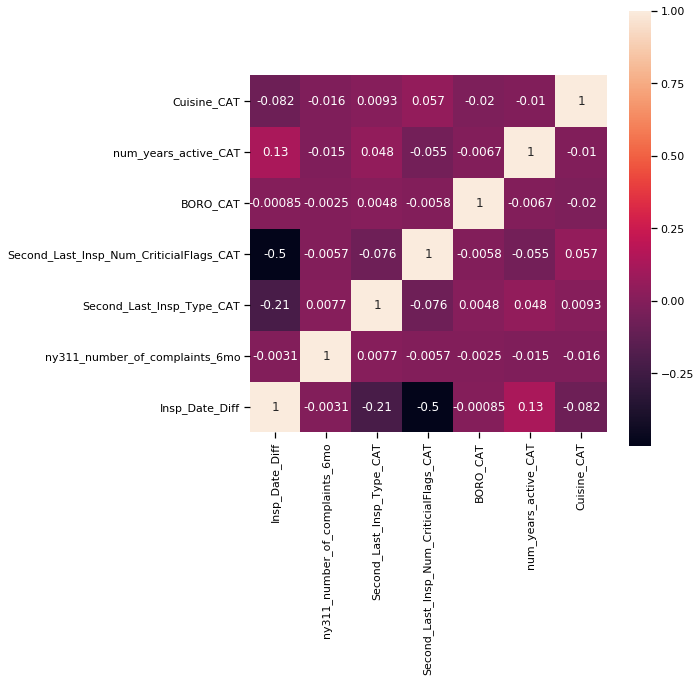

In [274]:
sns.set_context("notebook")
plt.tight_layout()
corr=Good_x.corr()
plt.figure(figsize=(8,8))
g = sns.heatmap(corr, cbar=True, annot=True, square=True)
g.set_ylim(0,8)
#plt.savefig('Correlation_Matrix.png')

In [275]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

train test split

In [276]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Good_x, Good_y, test_size=0.25, random_state=0)

In [277]:
x_test.shape
y_test.shape
x_train.shape
y_train.shape

(5940, 7)

(5940,)

(17819, 7)

(17819,)

In [278]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [279]:
predictions = logisticRegr.predict(x_test)

In [280]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.8361952861952862


<Figure size 576x576 with 0 Axes>

Text(40.5, 0.5, 'Actual label')

Text(0.5, 168.66, 'Predicted label')

Text(0.5, 1, 'Accuracy Score: 0.8361952861952862')

Text(0.5, 168.66, 'true group')

Text(40.5, 0.5, 'predicted group')

(0, 2)

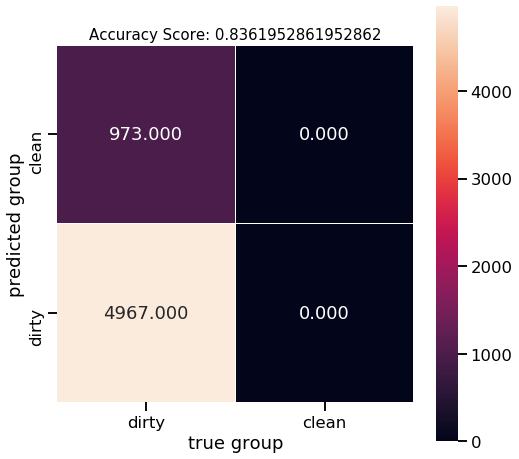

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set_context('talk')
Ages = ['dirty', 'clean']
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
g = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,
           xticklabels=Ages,
           yticklabels=Ages);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.xlabel('true group')
plt.ylabel('predicted group')
g.set_ylim(0,2)
plt.savefig('Confusion_Matrix.png')